<a href="https://colab.research.google.com/github/santamus/lab1/blob/main/lab3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [403]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/04cars.dat', sep=";", names=["Name","Sports","Sport Utility","Wagon","Minivan","Pickup","All-Wheel Drive","Rear-Wheel Drive", "Retail Price","Dealer Cost","Engine Size","Cylinders","Horsepower","City MPG","Highway MPG","Weight","Wheel Base","Length", "Width"])

In [404]:
data

,Name,Sports,Sport Utility,Wagon,Minivan,Pickup,All-Wheel Drive,Rear-Wheel Drive,Retail Price,Dealer Cost,Engine Size,Cylinders,Horsepower,City MPG,Highway MPG,Weight,Wheel Base,Length,Width
0,Chevrolet Aveo 4dr,0,0,0,0,0,0,0,11690,10965,1.6,4.0,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,0,0,0,0,0,0,0,12585,11802,1.6,4.0,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,0,0,0,0,0,0,0,14610,13697,2.2,4.0,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,0,0,0,0,0,0,0,14810,13884,2.2,4.0,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,0,0,0,0,0,0,0,16385,15357,2.2,4.0,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Nissan Titan King Cab XE,0,0,0,0,1,1,0,26650,24926,5.6,8.0,305,14.0,18.0,5287.0,140.0,NaN,NaN
424,Subaru Baja,0,0,0,0,1,1,0,24520,22304,2.5,4.0,165,21.0,28.0,3485.0,104.0,NaN,NaN
425,Toyota Tacoma,0,0,0,0,1,0,1,12800,11879,2.4,4.0,142,22.0,27.0,2750.0,103.0,NaN,NaN
426,Toyota Tundra Regular Cab V6,0,0,0,0,1,0,1,16495,14978,3.4,6.0,190,16.0,20.0,3925.0,128.0,NaN,NaN


In [405]:
targetCol = []
for index, row in data.iterrows():
    target = 0
    if row["Sport Utility"] == 1:
        target = 1
    if row["Wagon"] == 1:
        target = 2
    if row["Minivan"] == 1:
        target = 3
    if row["Pickup"] == 1:
        target = 4
    if row["All-Wheel Drive"] == 1:
        target = 5
    if row["Rear-Wheel Drive"] == 1:
        target = 6
    targetCol.append(target)
df1 = pd.DataFrame(targetCol, columns=['target'])
data = data.join(other=df1)
data = data.drop(data.columns[[0,1,2,3,4,5,6,7]], axis=1)
data = data.dropna() 
data

,Retail Price,Dealer Cost,Engine Size,Cylinders,Horsepower,City MPG,Highway MPG,Weight,Wheel Base,Length,Width,target
0,11690,10965,1.6,4.0,103,28.0,34.0,2370.0,98.0,167.0,66.0,0
1,12585,11802,1.6,4.0,103,28.0,34.0,2348.0,98.0,153.0,66.0,0
2,14610,13697,2.2,4.0,140,26.0,37.0,2617.0,104.0,183.0,69.0,0
3,14810,13884,2.2,4.0,140,26.0,37.0,2676.0,104.0,183.0,68.0,0
4,16385,15357,2.2,4.0,140,26.0,37.0,2617.0,104.0,183.0,69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
399,28790,26120,3.4,6.0,185,19.0,26.0,3948.0,120.0,201.0,72.0,3
400,23845,21644,3.4,6.0,185,19.0,26.0,3803.0,112.0,187.0,72.0,3
401,31370,28454,3.4,6.0,185,18.0,24.0,4431.0,121.0,201.0,72.0,5
402,23495,21198,3.3,6.0,230,19.0,27.0,4120.0,119.0,200.0,77.0,3


In [406]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('target', axis=1))
scaled_features = scaler.transform(data.drop('target', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('target', axis=1).columns)



In [407]:
#Разделение датасета на обучающие и тестовые данные
from sklearn.model_selection import train_test_split
x = scaled_data
y = data['target']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)
print(x_training_data)
print("-------------------------------------------------")
print(y_training_data)
print("-------------------------------------------------")
print(x_test_data)
print("-------------------------------------------------")
print(y_test_data)


     Retail Price  Dealer Cost  Engine Size  ...  Wheel Base    Length     Width
24      -0.997566    -0.985044    -1.310352  ...   -0.877708 -0.526534 -0.973993
65      -0.664556    -0.670636    -1.705217  ...   -0.595118 -0.753447 -0.973993
198      1.825655     1.831820     1.256275  ...    1.524306  0.986224  1.106880
305      0.632963     0.525636     1.552424  ...    0.393947  0.229845  0.809612
374     -0.385356    -0.404164     1.157558  ...    0.535242  0.381121  1.998682
..            ...          ...          ...  ...         ...       ...       ...
37      -0.950863    -0.901869    -0.816770  ...   -1.301593 -1.055999 -0.973993
341     -0.558714    -0.561955     0.367827  ...    0.676536  0.229845 -0.379458
220      0.958865     1.011372     0.071678  ...   -0.029938 -0.526534 -0.973993
90      -0.618107    -0.604242    -1.211635  ...   -1.160298 -0.980361 -0.973993
32      -0.883601    -0.874238    -0.915486  ...   -0.595118  0.002932 -1.271260

[290 rows x 11 columns]
---

K =  6
Error =  0.26804123711340205


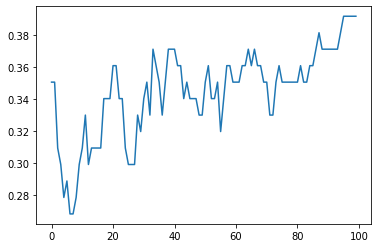

In [408]:
#Выбор оптимального значения для K с помощью метода «Локтя»
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
val, idx = min((val, idx) for (idx, val) in enumerate(error_rates))
plt.plot(error_rates)
print("K = ",idx)
print("Error = ",error_rates[idx])

In [409]:
#Обучение модели K-ближайших соседей
model = KNeighborsClassifier(n_neighbors = idx)
model.fit(x_training_data, y_training_data)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [410]:
#Делаем предсказания с помощью алгоритма K-ближайших соседей
predictions = model.predict(x_test_data)


In [411]:
#Оценка точности нашей модели
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        48
           1       0.33      0.67      0.44         3
           2       0.00      0.00      0.00         3
           3       0.83      0.83      0.83         6
           5       0.57      0.42      0.48        19
           6       0.75      0.83      0.79        18

    accuracy                           0.71        97
   macro avg       0.54      0.59      0.56        97
weighted avg       0.69      0.71      0.70        97



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [412]:
#Генерируем матрицу ошибок
error_matrix = confusion_matrix(y_test_data, predictions)
print(error_matrix)
print()
print("Percentage of errors = " + str(round(1-error_matrix[1,1]/np.sum(error_matrix,axis=1).tolist()[1], 3)))


[[39  0  0  1  5  3]
 [ 1  2  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  5  1  0]
 [ 5  4  0  0  8  2]
 [ 3  0  0  0  0 15]]

Percentage of errors = 0.333
